# COGS 108 - Final Project 

# Overview

*Fill in your overview here*

# Names

- Amir Rashidi
- Amir Farhan
- Byungkwon Han
- Xiaotian Shi
- Jason Tam

# Group Members IDs

- A15752965
- A########
- A########
- A########

# Research Question

When is the best time for manufacturers to release a movie in the United States, in order to maximize revenue?

## Background and Prior Work

*Fill in your background and prior work here* 

References (include links):
- 1)
- 2)

# Hypothesis


Although the revenue that a movie eventually earns depends on many different factors, it directly depends on how many tickets it can sell.<br>
<br>
Based on this, our first assumption is that a movie earns more if it is released during the leisure months of its targeted audiences. Thus, it will be more legitimate to compare movies within the same genre. We will be focusing on specific genre(s) when analyzing our data.<br>
<br>
Our second hypothesis, which follows the first, is that the revenue is also influenced by the release time relative to other events. Since people's money and time are limited, if the movie is released when there are other events (major social/entertainment events, or other popular movies) coming, people who originally plan to watch the movie may give up on it.<br>
<br>
The qualities of movies could be a potential confounding factor here, since it is natural for people to not watch movies that are rated badly. We will compare movies that are roughly at the same level, measuring primarily by the ratings.

# Dataset(s)

Dataset Name: The Numbers Domestic Boxoffice Dataset<br>
Link to the dataset: https://www.the-numbers.com/box-office-records/domestic/all-movies/cumulative/all-time<br>
Number of observations: 1100<br>
Description: This dataset contains 1100 bestseller movies along with their domestic, international, and worldwide box<br>offices. We will only be using the domestic box offices.

Dataset Name: OMDb Movie Dataset<br>
Link to the dataset: https://www.omdbapi.com<br>
Number of observations: 1098<br>
Description: This dataset contains IMDb, Metacritic, and Rotten Tomatoes ratings of the movies in the other dataset. It also contains <br>the release dates. 

We will join the two datasets on movie name in order to get the ratings, release dates, and box offices information in the same data frame.

# Setup

Before we start setting up and cleaning the data, we deleted 2 rows from The Numbers Domestic Boxoffice Dataset, because the form of the 2 rows make it hard to query data from OMDb. Moreover, after manually fixing the form, it seems that the result from OMDb to be containing all NaN values. Thus, we decided to remove those 2 rows. As a result, the joined dataset has 1098 rows.

In [1]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# omdb_joined.csv is the dataset resulting from joining the two raw datasets
df_omdb = pd.read_csv("./data/omdb_joined.csv")

# Data Cleaning

Describe your data cleaning steps here.

In [3]:
# Use the ranks as indices
# The unnamed columns, which represent the original indices, will be dropped
df_omdb.set_index('Rank', inplace=True)
df_omdb.drop(df_omdb.columns[df_omdb.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

In [4]:
# Rename the column names('Released' -> 'Year', 'Released Month' -> 'Month', 'IMDB Votes' -> 'IMDb Votes')
df_omdb.rename(index=str, columns={'Released': 'Year', 'Released Month': 'Month',
                                   'IMDB Votes': 'IMDb Votes'}, inplace=True)

In [5]:
# Count the number of NaN values in the 'Month' and 'DomesticBox Office' column
# These rows will be dropped because the release month and box offices are the primary targets
# that we will be exploring, without these values, the row is useless
naMonth = df_omdb['Month'].isna().sum()
naBoxOffice = df_omdb['DomesticBox Office'].isna().sum()
print('NaN Month count:', naMonth)
print('NaN Box Office count:', naBoxOffice)

NaN Month count: 2
NaN Box Office count: 0


The result of the last cell shows that we have 2 NaN values in the 'Month' column, and 0 NaN values in the 'DomesticBox Office' column. We will drop the two rows which contain NaN Months.

In [6]:
# Drop NaNs in Month column
# Convert the Month column to only containing release months
df_omdb.dropna(subset=['Month'], inplace=True)
for idx, row in df_omdb.iterrows():
    month = row['Month'][3:6]
    df_omdb.at[idx, 'Month'] = month

# convert the Month column to integer
look_up = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 
           'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}

df_omdb['Month'] = df_omdb['Month'].apply(lambda x: look_up[x])

In [7]:
# Drop the columns 'InternationalBox Office' and 'WorldwideBox Office'
# Our question only concerns the domestic revenues, we won't need these two columns
df_omdb.drop(axis=1, columns=['InternationalBox Office', 'WorldwideBox Office'], inplace=True)

In [8]:
# Convert the 'DomesticBox Office' column to integers
for idx, row in df_omdb.iterrows():
    revenue = ''.join(filter(str.isdigit, row['DomesticBox Office']))
    df_omdb.at[idx, 'DomesticBox Office'] = revenue

df_omdb['DomesticBox Office'] = pd.to_numeric(df_omdb['DomesticBox Office'])

In [9]:
# Convert the 'IMDb Votes' column to integers
def votes_to_int(strin):
    strin = strin.replace(',', '')
    return int(strin)

df_omdb.loc[:, 'IMDb Votes'] = df_omdb['IMDb Votes'].apply(votes_to_int)

In [10]:
# Reorder the columns
df_omdb = df_omdb[['Movie', 'Genre', 'Year', 'Month', 'DomesticBox Office',
                   'IMDb Votes', 'IMDb Ratings', 'Metacritic', 'Rotten Tomatoes']]

In [11]:
# Check whether the dataframe is in good shape
print("Unique months:", df_omdb['Month'].unique())
print("Box Office Column dtype:", df_omdb['DomesticBox Office'].dtype)

Unique months: [12  2  4  6  5  7  3 11  1  8  9 10]
Box Office Column dtype: int64


In [12]:
# save intermediate dataframe
df_omdb.to_csv('./data/omdb_cleaned.csv')

<b>Summary of Data Cleaning</b><br>
The two datasets are good enough that their data are already standardized. All the values in the DomesticBox Office column can be converted to int64 easily, and all values in the Month column all have the same format. Thus, our job on data cleaning is fairly simple<br>
<br>
<b>1. Pre-processsing:</b> 2 rows dropped from The Numbers Domestic Boxoffice Dataset (deleted directly in the file). Those two rows result in NaN values when querying the second dataset.<br>
<br>
<b>2. Columns Dropped:</b> 'InternationalBox Office', 'WorldwideBox Office'<br>
Our question concerns the domestic revenue of the movies. These two information in the data frame will not be used. We believe this will not affect the result because they are irrelevant.<br>
<br>
<b>3. Rows Dropped:</b> 2 rows where the 'Month' column contain NaN<br>
We have to drop these two rows because they do not contain a critical row of our interest. We are exploring the relationship between the release time and domestic revenue. Without the Month column the rows are useless.<br>
<br>
<b>4. Other informations dropped:</b> The exact release dates originally contained in the 'Month' column<br>
We dropped this information because we are not studying exact dates. Instead, we only care about the relationship between the release month and domestic revenue. Different release dates may also influence the revenue of a movie. However, because movies are often on show for several weeks, we decide to not consider this information. By doing this, we risk losing some information that might influence our result.

# Descriptive Analysis

Obtain the cleaned data. 

In [13]:
df = pd.read_csv('./data/omdb_cleaned.csv')

# Size

In [14]:
# Print the size of the data
num_movies,info = df.shape
print("Number of movies: ", num_movies)
print("Variables for each movie: ", info)

Number of movies:  1096
Variables for each movie:  10


# Missingness

In [15]:
# Output the number of null elemeents in each column of the data
df.isnull().sum()

Rank                   0
Movie                  0
Genre                  0
Year                   0
Month                  0
DomesticBox Office     0
IMDb Votes             0
IMDb Ratings           0
Metacritic            16
Rotten Tomatoes       24
dtype: int64

For ratings, we will not be using information from Metacritic or Rotten Tomatoes. Instead, we will only be using data from IMDb. Therefore, we will not have any missing data in our analysis.

# Shape

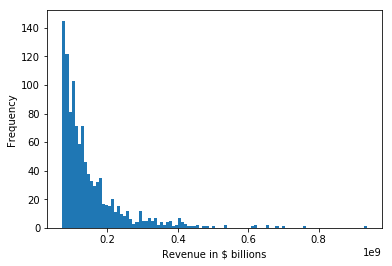

In [16]:
# Plot a histogram comparing the number of movies that make each revenue category
plt.figure()
plt.xlabel("Revenue in $ billions")
df['DomesticBox Office'].plot.hist(bins=100)

f1 = plt.gcf()

We can see from the graph that the data is heavily skewed right indicating that revenue is usually around 100 billion. 

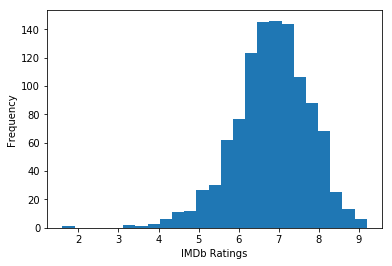

In [17]:
# Plot a histogram comparing the number of movies that get a certain rating on IMDb
plt.figure()
plt.xlabel("IMDb Ratings")
df['IMDb Ratings'].plot.hist(bins=25)

f2 = plt.gcf()

We can see from the graph that the data is normally distributed with a peak at 7.

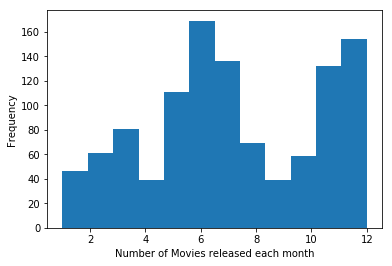

In [18]:
plt.figure()
plt.xlabel("Number of Movies released each month")
df['Month'].plot.hist(bins=12)

f2 = plt.gcf()

# Central Tendency

Since the data for revenue is skewed, we will find the median for the following steps since mean will not be a good indicator of central tendency. The data for ratings is mostly normal so we can use mean for ratings because the mean will be around the middle of the data.

In [19]:
median_revenue = df['DomesticBox Office'].median()
mean_ratings = df['IMDb Ratings'].mean()
print("The median for revenues is $", median_revenue)
print("The mean for rating is ", mean_ratings)

The median for revenues is $ 118532934.0
The mean for rating is  6.806386861313869


# Variability

For revenue, we use IQR since our central tendency was calculated using median and std wouldn't be a good indication of variability with a skewed graph. For ratings, we use standard deviation because we can see how far our data is from a line of best fit.

In [20]:
lower_revenue,upper_revenue = np.percentile(df['DomesticBox Office'], [25,75])
iqr_revenue = upper_revenue - lower_revenue
print("The interquatile range for revenues is $" + str(iqr_revenue))
std_ratings = df['IMDb Ratings'].std()
print("The standard deviation of ratings is " + str(std_ratings))

The interquatile range for revenues is $82755090.0
The standard deviation of ratings is 0.9275072361079976


# Exploratory Analysis

In [21]:
# Read the cleaned data
df = pd.read_csv('./data/omdb_cleaned.csv')
df

,Rank,Movie,Genre,Year,Month,DomesticBox Office,IMDb Votes,IMDb Ratings,Metacritic,Rotten Tomatoes
0,1,Star Wars Ep. VII: The Force Awakens,"Action, Adventure, Fantasy, Sci-Fi",2015,12,936662225,778602,8.0,81/100,92%
1,2,Avatar,"Action, Adventure, Fantasy, Sci-Fi",2009,12,760507625,1038709,7.8,83/100,82%
2,3,Black Panther,"Action, Adventure, Sci-Fi",2018,2,700059566,501220,7.3,88/100,97%
3,4,Avengers: Infinity War,"Action, Adventure, Sci-Fi",2018,4,678815482,641255,8.5,68/100,85%
4,5,Titanic,"Drama, Romance",1997,12,659363944,946032,7.8,75/100,89%
5,6,Jurassic World,"Action, Adventure, Sci-Fi",2015,6,652270625,534122,7.0,59/100,72%
6,7,The Avengers,"Action, Adventure, Sci-Fi",2012,5,623279547,1165317,8.1,69/100,92%
7,8,Star Wars Ep. VIII: The Last Jedi,"Action, Adventure, Fantasy, Sci-Fi",2017,12,620181382,455389,7.2,85/100,91%
8,9,Incredibles 2,"Animation, Action, Adventure, Comedy, Family, ...",2018,6,608581744,192447,7.7,80/100,94%
9,10,The Dark Knight,"Action, Crime, Drama, Thriller",2008,7,533720947,2039506,9.0,84/100,94%


In exploratory analysis, we firstly want to describe our data using `pd.DataFrame.describe()`.

In [22]:
df.describe()

,Rank,Year,Month,DomesticBox Office,IMDb Votes,IMDb Ratings
count,1096.000000,1096.000000,1096.000000,1.096000e+03,1.096000e+03,1096.000000
mean,551.400547,2003.415146,7.190693,1.500567e+08,2.549702e+05,6.806387
std,317.860478,12.263027,3.326817,9.448059e+07,2.500038e+05,0.927507
min,1.000000,1937.000000,1.000000,7.200678e+07,1.900000e+01,1.600000
25%,276.750000,1998.000000,5.000000,9.039504e+07,9.171950e+04,6.300000
50%,552.500000,2006.000000,7.000000,1.185329e+08,1.827670e+05,6.900000
75%,826.250000,2012.000000,11.000000,1.731501e+08,3.282615e+05,7.425000
max,1100.000000,2019.000000,12.000000,9.366622e+08,2.039506e+06,9.200000


In [23]:
df['Genre'].value_counts()

Action, Adventure, Sci-Fi                                       50
Comedy                                                          46
Comedy, Romance                                                 37
Comedy, Drama, Romance                                          30
Animation, Adventure, Comedy, Family, Fantasy                   28
Action, Adventure, Sci-Fi, Thriller                             26
Action, Adventure, Thriller                                     23
Action, Adventure, Fantasy, Sci-Fi                              21
Action, Crime, Thriller                                         18
Crime, Drama, Thriller                                          16
Drama, Romance                                                  15
Comedy, Drama                                                   14
Animation, Adventure, Comedy, Family                            13
Action, Adventure, Fantasy                                      13
Comedy, Crime                                                 

In [24]:
import scipy.stats as st
st.pearsonr(df['Month'], df['DomesticBox Office'])

(0.006855085213249209, 0.820666827309)

In [25]:
st.f_oneway(df['Month'], df['DomesticBox Office'])

F_onewayResult(statistic=2764.6254178122613, pvalue=0.0)

Now, let's take a look at the top 5 and bottom 5 rows to see how the data is presented to us and get a feel of our data.

In [26]:
df.head()
df[df['Movie'].str.contains("Iron Man")]

,Rank,Movie,Genre,Year,Month,DomesticBox Office,IMDb Votes,IMDb Ratings,Metacritic,Rotten Tomatoes
26,27,Iron Man 3,"Action, Adventure, Sci-Fi",2013,5,408992272,678031,7.2,62/100,79%
67,68,Iron Man,"Action, Adventure, Sci-Fi",2008,5,318604126,854168,7.9,79/100,93%
72,73,Iron Man 2,"Action, Adventure, Sci-Fi",2010,5,312433331,650168,7.0,57/100,73%


In [27]:
df.tail()

,Rank,Movie,Genre,Year,Month,DomesticBox Office,IMDb Votes,IMDb Ratings,Metacritic,Rotten Tomatoes
1091,1096,Michael Jackson's This Is It,Documentary,2009,1,72091016,26,8.2,NaN,NaN
1092,1097,10 Cloverfield Lane,"Drama, Horror, Mystery, Sci-Fi, Thriller",2016,3,72082999,257525,7.2,76/100,90%
1093,1098,Get Shorty,"Comedy, Crime, Thriller",1995,10,72021008,70696,6.9,82/100,87%
1094,1099,"I Love You, Man","Comedy, Romance",2009,3,72013010,185149,7.0,70/100,83%
1095,1100,Fred Claus,"Comedy, Family, Fantasy",2007,11,72006777,37050,5.6,42/100,20%


One of our main goals is to compare

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 10 columns):
Rank                  1096 non-null int64
Movie                 1096 non-null object
Genre                 1096 non-null object
Year                  1096 non-null int64
Month                 1096 non-null int64
DomesticBox Office    1096 non-null int64
IMDb Votes            1096 non-null int64
IMDb Ratings          1096 non-null float64
Metacritic            1080 non-null object
Rotten Tomatoes       1072 non-null object
dtypes: float64(1), int64(5), object(4)
memory usage: 85.7+ KB


362
734


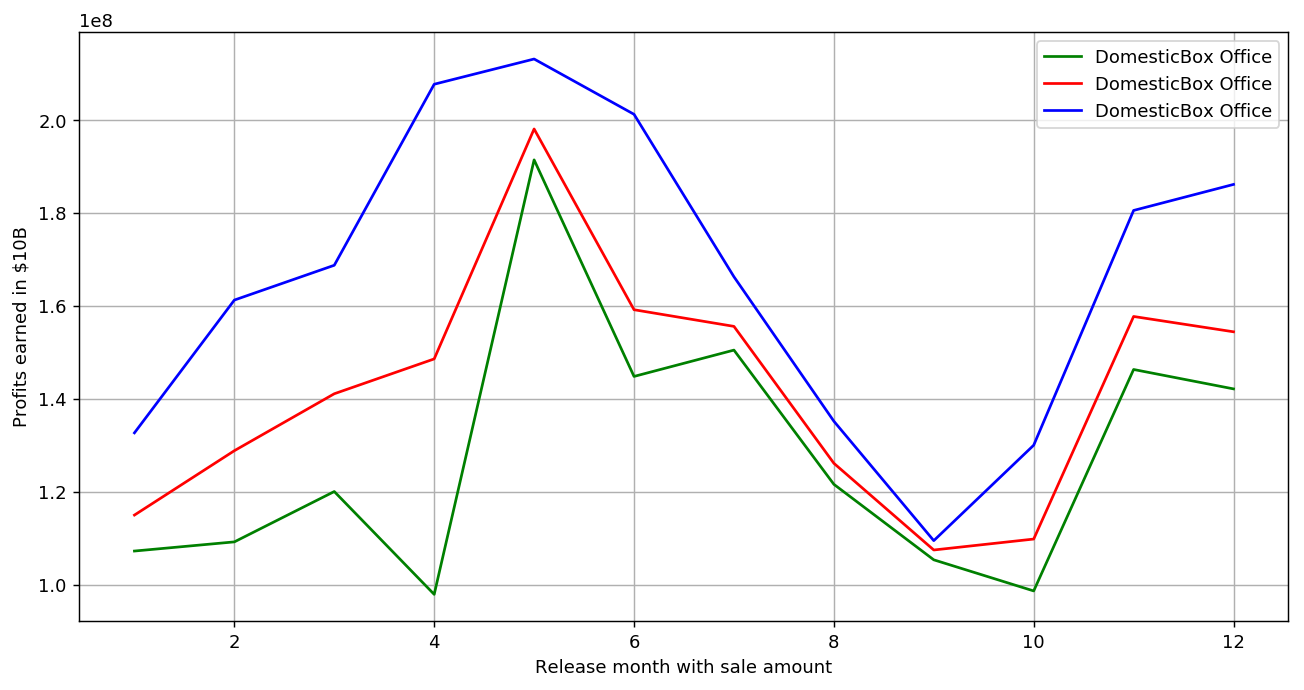

In [29]:
monthly_comp = df.groupby('Month')['DomesticBox Office'].mean()
df_newer = df[df['Year']>2010]
print(len(df_newer))
monthly_comp_newer = df_newer.groupby('Month')['DomesticBox Office'].mean()
df_older = df[df['Year']<=2010]
print(len(df_older))
monthly_comp_older = df_older.groupby('Month')['DomesticBox Office'].mean()
plt.figure(figsize=(12,6),dpi=130)
plt.xlabel('Release month with sale amount')
plt.ylabel('Profits earned in $10B')
plt.grid()
plt.plot(monthly_comp_older, 'g')
plt.plot(monthly_comp, 'r')
plt.plot(monthly_comp_newer, 'b')
plt.legend()
plt.show()

In [30]:
df_action = df[df['Genre'].str.contains('Action')]
df_drama = df[df['Genre'].str.contains('Drama')]
df_scifi = df[df['Genre'].str.contains('Sci-Fi')]
df_comedy = df[df['Genre'].str.contains('Comedy')]
#df_action = df[df['Genre']]

169
241


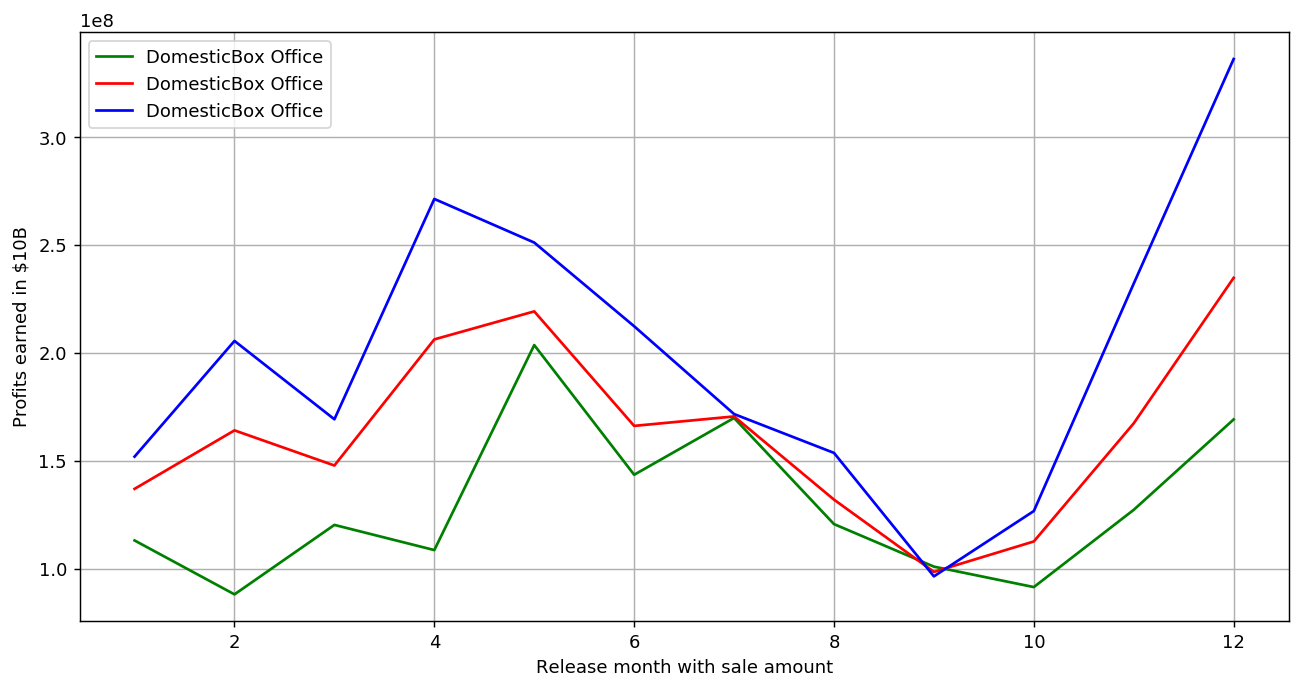

In [31]:
monthly_comp_action = df_action.groupby('Month')['DomesticBox Office'].mean()
df_newer_action = df_action[df_action['Year']>2010]
print(len(df_newer_action))
monthly_comp_newer_action = df_newer_action.groupby('Month')['DomesticBox Office'].mean()
df_older_action = df_action[df_action['Year']<=2010]
print(len(df_older_action))
monthly_comp_older_action = df_older_action.groupby('Month')['DomesticBox Office'].mean()
plt.figure(figsize=(12,6),dpi=130)
plt.xlabel('Release month with sale amount')
plt.ylabel('Profits earned in $10B')
plt.grid()
plt.plot(monthly_comp_older_action, 'g')
plt.plot(monthly_comp_action, 'r')
plt.plot(monthly_comp_newer_action, 'b')
plt.legend()
plt.show()

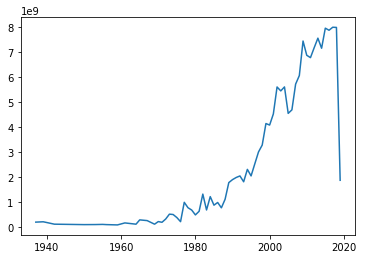

In [32]:
profits_year = df.groupby('Year')['DomesticBox Office'].sum()
plt.plot(profits_year)

# Data Analysis & Results

In [33]:
import patsy
import statsmodels.api as sm

## Analysis 2: Revenue as a result of release month and ratings

In [34]:
df = pd.read_csv('./data/omdb_cleaned.csv')

First we will visualize the Revenue vs. Month (for all time) again as a box plot in order to eliminate the influences of outliers.

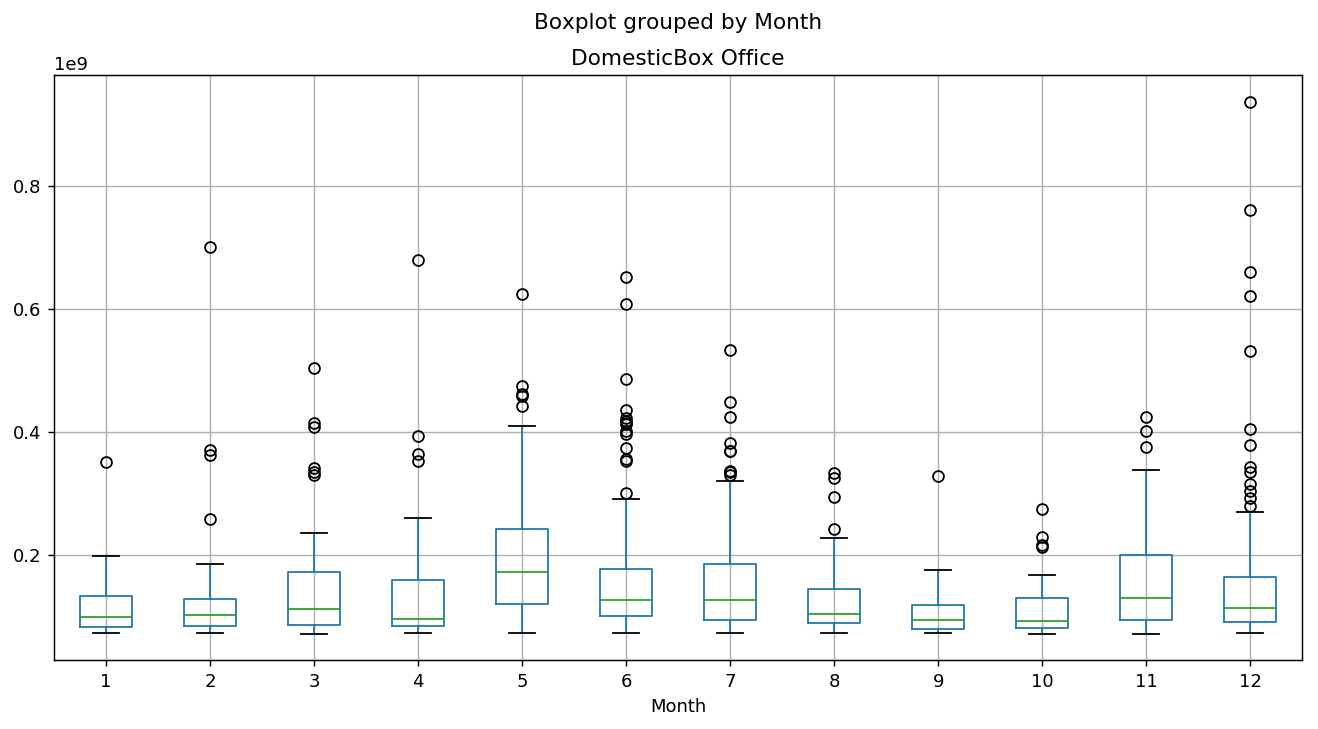

In [35]:
plt.figure(figsize=(12,6),dpi=130)
df.boxplot(by='Month', column='DomesticBox Office', ax=plt.gca())
plt.show()

We can see that overall May is the month that movies get highest revenues. Movies in January, Feburary, September, and October have low revenues. April's Movies also get low revenues overall, but April also has many profitable movies.

Then we will draw the average ratings of movies categorized by release month.

In [36]:
def percent_to_int(strin):
    strin = strin.strip('%')
    return float(strin)/10

def score_to_int(strin):
    strin = strin.split('/')[0]
    return float(strin)/10

df_IMDb = df.copy().dropna(subset=['IMDb Ratings'])
df_Rotten_Tomatoes = df.copy().dropna(subset=['Rotten Tomatoes'])
df_Metacritic = df.copy().dropna(subset=['Metacritic'])

df_Rotten_Tomatoes.loc[:, 'Rotten Tomatoes'] = df_Rotten_Tomatoes['Rotten Tomatoes'].apply(percent_to_int)
df_Metacritic.loc[:, 'Metacritic'] = df_Metacritic['Metacritic'].apply(score_to_int)

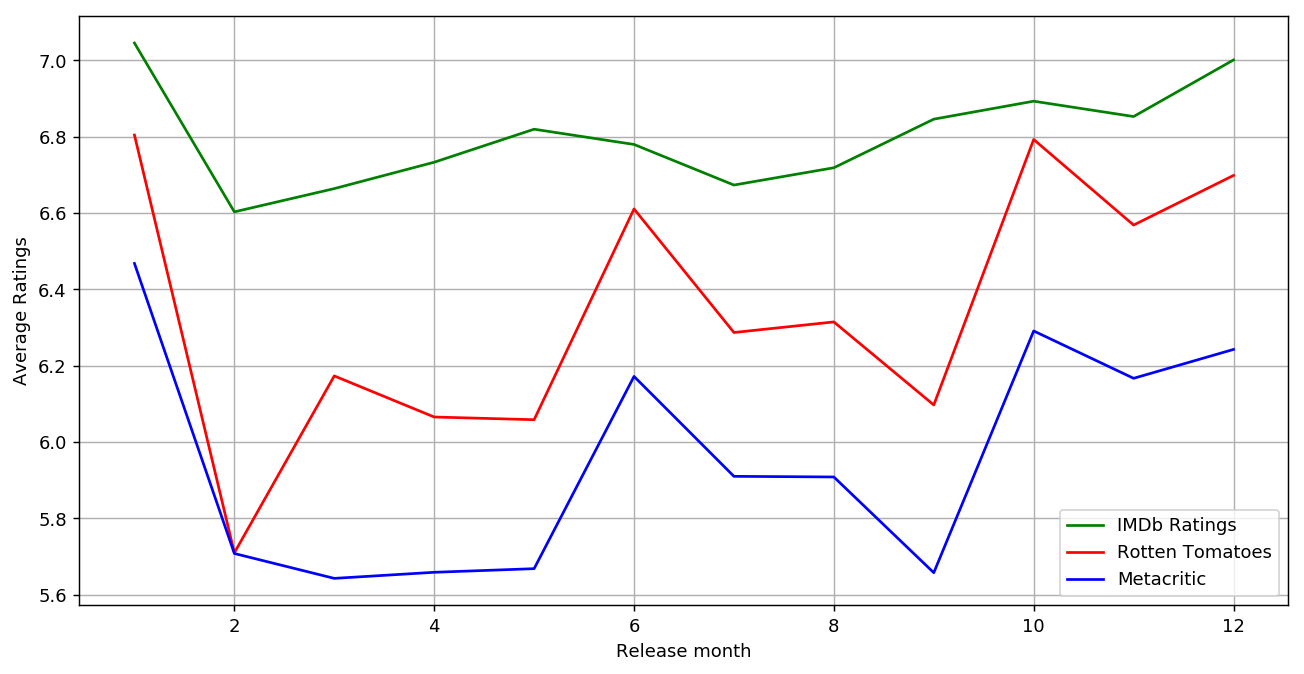

In [37]:
monthly_average_IMDb = df_IMDb.groupby('Month')['IMDb Ratings'].mean()
monthly_average_RT = df_Rotten_Tomatoes.groupby('Month')['Rotten Tomatoes'].mean()
monthly_average_Metacritic = df_Metacritic.groupby('Month')['Metacritic'].mean()

plt.figure(figsize=(12,6),dpi=130)
plt.xlabel('Release month')
plt.ylabel('Average Ratings')
plt.grid()
plt.plot(monthly_average_IMDb, 'g')
plt.plot(monthly_average_RT, 'r')
plt.plot(monthly_average_Metacritic, 'b')
plt.legend()
plt.show()

The three kinds of ratings have roughly the same shape. And they also have roughly the same trend as the curve of Revenue vs. Month, except that the ratings are high in January while the revenues are low. The shape is also similar to the graph of 'Number of Moview released per month'. Thus, we think it is necessary to consider ratings as a potential confounding variable. And see if it has some impacts on revenue. Since all three curves have roughly the same shape, we decide to only use the IMDb ratings in this section. Also, we will only use the movies that receive enough votes for IMDb (more than 25% percentile in the votes field).

In [38]:
quantile = df_IMDb['IMDb Votes'].quantile(0.25)
df_ratings = df_IMDb[df_IMDb['IMDb Votes'] > quantile]

First, we will draw the curve of Revenue vs. Ratings

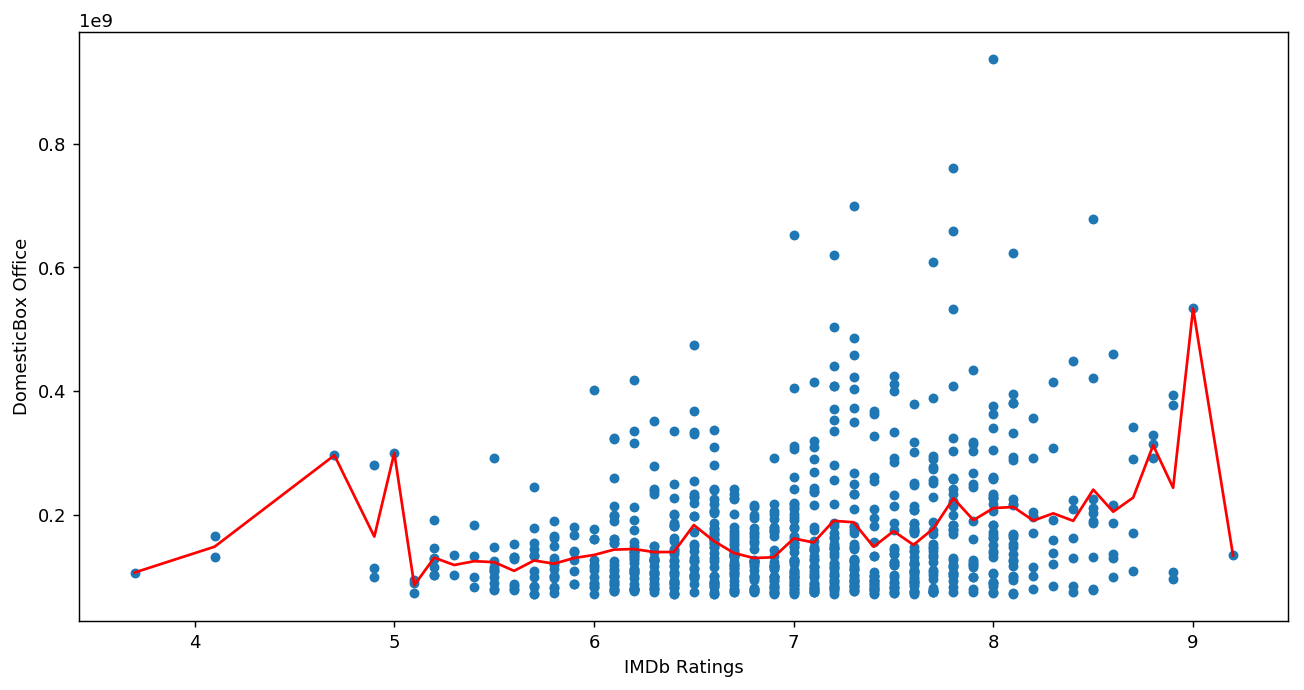

In [39]:
plt.figure(figsize=(12,6),dpi=130)
df_ratings.plot(kind='scatter', x='IMDb Ratings', y='DomesticBox Office', ax=plt.gca())
ratingly_average_revenue = df_ratings.groupby('IMDb Ratings')['DomesticBox Office'].mean()
plt.plot(ratingly_average_revenue, 'r')
plt.show()

It seems that there might be a positive correlation between ratings and revenues, but the correlation does not seem too strong.<br>

We will then use a linear model to explore the correlations between revenue, release month, and ratings.

In [40]:
outcome1, predictors1 = patsy.dmatrices("Q('DomesticBox Office') ~ C(Month) + Q('IMDb Ratings')", df_ratings)
model1 = sm.OLS(outcome1, predictors1)
res1 = model1.fit()
print(res1.summary())

                               OLS Regression Results                              
Dep. Variable:     Q('DomesticBox Office')   R-squared:                       0.127
Model:                                 OLS   Adj. R-squared:                  0.114
Method:                      Least Squares   F-statistic:                     9.802
Date:                     Wed, 29 May 2019   Prob (F-statistic):           4.79e-18
Time:                             18:44:24   Log-Likelihood:                -16274.
No. Observations:                      822   AIC:                         3.257e+04
Df Residuals:                          809   BIC:                         3.264e+04
Df Model:                               12                                         
Covariance Type:                 nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

In [41]:
outcome_2, predictors_2 = patsy.dmatrices("Q('IMDb Ratings') ~ C(Month)", df_ratings)
model2 = sm.OLS(outcome_2, predictors_2)
res2 = model2.fit()
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:      Q('IMDb Ratings')   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     2.424
Date:                Wed, 29 May 2019   Prob (F-statistic):            0.00570
Time:                        18:44:25   Log-Likelihood:                -989.61
No. Observations:                 822   AIC:                             2003.
Df Residuals:                     810   BIC:                             2060.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          7.2500      0.144     50.

The result shows that there is a correlation between ratings and revenue, and also a correlation between release month and revenue, based on the p-value. However, there doesn't seem to be a significant relationship between release month and ratings. The r-squred value of ratings against month is also pretty low. Thus, we conclude that ratings do not eliminate the possibility of revenue being dependent on release month. Although the r-squred value of the first model is not high, we believe that it is enough to say that the revenue is partially dependent on release month and ratings.<br>
One thing to note here is that ratings can, to some degrees, reflect the qualities of the movies, which could also influence the revenue. Thus, the correlation between revenue and ratings might not be a direct correlation. However, for our purpose, it is enough to conclude that revenue is dependent on release month even when considering the ratings.

## Analysis 3: Predict the future revenue based on month

In [2]:
#Linear regression and classification. 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import accuracy_score
#X_train and Y_train will be corresponding Y to the X value 
reg = LinearRegression().fit(X_train, Y_train)
print(reg.coef_)
print(reg.intercept_)

def regression (x,y):
    w = reg.coef_
    b = reg.intercept_
    reg_diff = 0
    wTrans= w.transpose()
    x = np.transpose(x)
    yi = np.dot(wTrans,x) + b
    addAll=0
    yiSub = yi - y
    square = np.square(yiSub)
    addAll = np.sum(square)
    N = len(yi)
    reg_diff = np.sqrt(addAll/N)
    return reg_diff

def classification (x,y):
    w = reg.coef_
    b = reg.intercept_
    clss_diff = 0
    th = 1/2 
    total = 0
    wTrans = w.transpose()
    x = np.transpose(x)
    yi = np.dot(wTrans,x) + b
    hx = np.ones(yi.shape)
    for idx, i in enumerate(yi):
        if i >= th:
            hx[idx] = 1
        elif i<th:
            hx[idx] = 0
    for idx,i in enumerate(hx):
        if i != y[idx]:
            total = total +1 
    clss_diff = total/len(yi)
    return clss_diff

print('Training regression and classification errors are:')
print(regression(X_train, Y_train))
print(classification(X_train, Y_train))
print('Testing regression and classification errors are:')
print(regression(X_test, Y_test))
print(classification(X_test, Y_test))

#Cross Validation with Simple Vector Machine 
def simple_cross_validation(X_train_val, Y_train_val, C, gamma, fold):
    """
    A simple cross-validation function.
    We assume the SVM with the RBF kernel.
    
    X_train_val: Features for train and val set. 
                 Shape: (num of data poirnts, num of features)
    Y_train_val: Labels for train and val set.
                 Shape: (num of data points,)
    C:           Parameter C for SVM.
    gamma:       Parameter gamma for SVM.
    fold:        The number of folds to do the cross-validation.
    
    Return the average accuracy on validation set.
    """
    val_acc_list = []
    train_acc_list = []
    train_val_X = np.array_split(X_train_val,fold)
    train_val_Y = np.array_split(Y_train_val,fold)
    svr = svm.SVC(kernel='rbf', C=C, gamma=gamma)
    for i in range(fold):
        x_val = train_val_X.pop(i)
        y_val = train_val_Y.pop(i)
        x_train = np.concatenate(train_val_X)
        y_train = np.concatenate(train_val_Y)
        svr.fit(x_train,y_train)
        val_acc = svr.score(x_val,y_val)
        train_acc = svr.score(x_train,y_train)
        val_acc_list.append(val_acc)
        train_acc_list.append(train_acc)
        
        train_val_X = np.array_split(X_train_val,fold)
        train_val_Y = np.array_split(Y_train_val,fold)
    return sum(val_acc_list) / len(val_acc_list), \
           sum(train_acc_list) / len(train_acc_list)

#KNN 
class simple_KNeighborsClassifier(object):
    def __init__(self, k):
        """
        k-NN initialization.
            k: Number of nearest neighbors.
        """
        self.k = k
        
    def fit(self, X_train, Y_train):
        """
        k-NN fitting function.
            X_train: Feature vectors in training set.
            Y_train: Labels in training set.
        """
        self.X_train = X_train
        self.Y_train = Y_train
        
    def predict(self, X_pred):
        """
        k-NN prediction function.
            X_pred: Feature vectors in training set.
        Return the predicted labels for X_pred. Shape: (len(X_pred), )
        """
        Y_pred = []
        #######FILL IN HERE #########
        for i, feature in enumerate(X_pred):
            Y_labels = []
            distance = []
            
            for ind, train in enumerate(self.X_train):
                dist = np.linalg.norm(np.array(train)-np.array(feature))
                distance.append([self.Y_train[ind],dist])
    
            distance.sort(key=operator.itemgetter(1))
            for ks in range(self.k):
                Y_labels.append(distance[ks][0])
                
            Y_pred.append(stats.mode(Y_labels)[0])
        return np.array(Y_pred)
    
    def score(self, X_pred, Y_pred):
        score = 0
        for ind, ans in enumerate(Y_pred):
            if ans == X_pred[ind]:
                score += 1
        return (score/(len(Y_pred)))
        

NameError: name 'X_train' is not defined

# Ethics & Privacy

*Fill in your ethics & privacy discussion here*

# Conclusion & Discussion

*Fill in your discussion information here*